# KNN

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,plot_confusion_matrix,recall_score,precision_score
scaler = StandardScaler()

In [2]:
df = pd.read_csv('colon.csv')
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### It a good practice to do feature scaling or standarization for knn to bring all of it to a common scale

In [3]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Lets create a function from scratch that use Elbow Method for seeing how each K neighbor does and return a elbow method graph and best output with confusion matrix

for function explanation please read the comment for step by step explanation

In [4]:
def elbowevaluation(k,weight):
    error_rate = [] # blank list for appending error rate
    for i in k: # loop to run 
        knn = KNeighborsClassifier(n_neighbors=i,weights = weight) # create model knn and assign it hyperparameter such as weight & neighbor
        knn.fit(X_train,y_train)# fit into model
        y_pred = knn.predict(X_test) # use model to predict y_pred from x_test
        error_rate.append(1-accuracy_score(y_test,y_pred)) # append error rate formula 1- accuracy
    plt.plot(k,error_rate)# plot the elbow graph
    plt.title('Elbow graph') # title 
    plt.xlabel('number of neighbor')# x label
    plt.ylabel('error rate') # y label
    plt.show()
    best_k = k[np.argmin(error_rate)] # argmin give out the index of the min item
    print(f'Best K values for weight = {weight} is K = {best_k}') 
    print(f'The following confusion matrix below is contructed by the k = {best_k}')
    bestknn = KNeighborsClassifier(n_neighbors=best_k,weights = weight).fit(X_train,y_train) # create instance set as best hyperparameter and fit it
    y_pred = bestknn.predict(X_test)
    print(f'Recall: {recall_score(y_test,y_pred)}','\nPrecision:',precision_score(y_test,y_pred))
    plot_confusion_matrix(bestknn,X_test, y_test) # plot the confusion matrix with the best hyperparameter

# Question B1 with weight as Distance

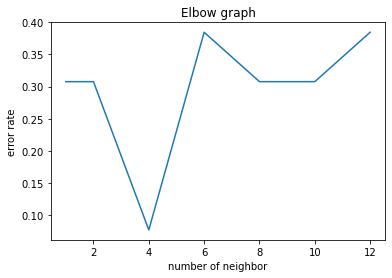

Best K values for weight = distance is K = 4
The following confusion matrix below is contructed by the k = 4
Recall: 1.0 
Precision: 0.8333333333333334


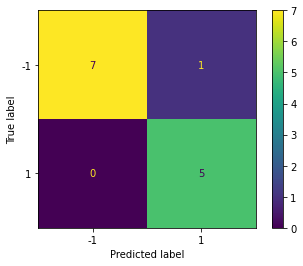

In [5]:
k = [ 1, 2, 4, 6, 8, 10, 12 ]
elbowevaluation(k, 'distance')

# # Question B2 with weight as 

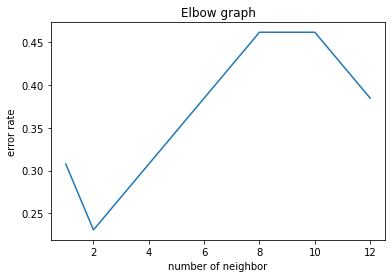

Best K values for weight = uniform is K = 2
The following confusion matrix below is contructed by the k = 2
Recall: 0.4 
Precision: 1.0


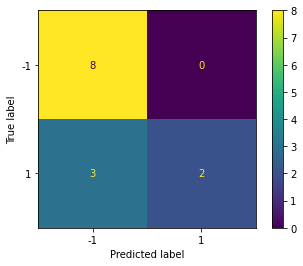

In [6]:
elbowevaluation(k, 'uniform')

# Explanation for comparison between weights = uniform and weights  = distance

## The best weights for cancer classification with collon.csv will be weight = distance

<b>Explanation: </b><p>The model that `weight = distance`, best hypermeter is `k = 4` gave out a recall of `1.0` or perfect recall as task such as patient screening is focus on recall than precision since predicting a sick people as healthy people mean the sick people or maybe with danger disease such as covid passed our screening this may lead to more infection within the country or area as we let the disease people pass. As high recall mean low false negative, false negative in this case mean model predicting cancer as healthy but high precision mean low false positive, false positive in this case means predicting healthy as cancer. in this case, the patient will be panic but further investment will be taken with patient wasted their time but in the end healthy so in cancer screening we focus on recall this is why I have choosen `weight= distance`</p>  